**Problem Statement**

“Forecast future inventory levels to support efficient stock management and reduce inventory-related losses.”












In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,4)

In [2]:
import warnings
warnings.filterwarnings("ignore")

Load The File

In [3]:
data_path = "/content/retail_store_inventory.csv"

In [4]:
print("Loading:", data_path)

Loading: /content/retail_store_inventory.csv


In [5]:
df = pd.read_csv(data_path)

df.shape:- check how many rows and columns are present in dataset

In [6]:
print("Shape:", df.shape)

Shape: (73100, 15)


df.column:- define the column names

In [7]:
print("Columns:", df.columns.tolist())

Columns: ['Date', 'Store ID', 'Product ID', 'Category', 'Region', 'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion', 'Competitor Pricing', 'Seasonality']


df.head():-Helps quickly understand how the dataset looks, column names, and sample values

In [8]:
df.head()

Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-01-01     S001      P0003         Toys   West              102   
3  2022-01-01     S001      P0004         Toys  North              469   
4  2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autumn  
1             Sunny                  0               66.16      Autumn  
2             Sunny                  1               31.32      Summer  
3            Cloudy                  1               34.74      Autumn  
4             Sunny                  0               68.95      Summer

df.info():- Helps identify datatypes, missing value percentages, numerical vs categorical columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

df.describe:-  Useful to check distribution (mean, std, min, max, outliers detection)

In [10]:
df.describe()

Inventory Level    Units Sold  Units Ordered  Demand Forecast  \
count     73100.000000  73100.000000   73100.000000     73100.000000   
mean        274.469877    136.464870     110.004473       141.494720   
std         129.949514    108.919406      52.277448       109.254076   
min          50.000000      0.000000      20.000000        -9.990000   
25%         162.000000     49.000000      65.000000        53.670000   
50%         273.000000    107.000000     110.000000       113.015000   
75%         387.000000    203.000000     155.000000       208.052500   
max         500.000000    499.000000     200.000000       518.550000   

              Price      Discount  Holiday/Promotion  Competitor Pricing  
count  73100.000000  73100.000000       73100.000000        73100.000000  
mean      55.135108     10.009508           0.497305           55.146077  
std       26.021945      7.083746           0.499996           26.191408  
min       10.000000      0.000000           0.000000            5.030000  
25%       32.650000      5.000000           0.000000           32.680000  
50%       55.050000     10.000000           0.000000           55.010000  
75%       77.860000     15.000000           1.000000           77.820000  
max      100.000000     20.000000           1.000000          104.940000

**Convert date column, drop invalid rows:-**
We convert the date column to datetime format because dates stored as text cannot be used for time-based operations like sorting, extracting year/month/day, making time-series models, or plotting trends. Converting them makes the data usable for analysis. We drop invalid or missing rows because incorrect, empty, or corrupted values can create errors, affect calculations, and reduce model accuracy. Cleaning these rows improves the quality of the dataset and ensures correct results.

In [11]:
date_col = None
for c in df.columns:
    if "date" in c.lower():
        date_col = c
        break
if date_col is None:
    raise ValueError("No column with 'date' in name found. Rename or tell me which is the date column.")


df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
# Drop rows where date conversion failed
df = df.dropna(subset=[date_col]).copy()
# Sort chronologically and reset index
df = df.sort_values(by=date_col).reset_index(drop=True)

print("Date range:", df[date_col].min(), "to", df[date_col].max())

Date range: 2022-01-01 00:00:00 to 2024-01-01 00:00:00


In [12]:
df.head()

Date Store ID Product ID     Category Region  Inventory Level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S004      P0013    Furniture   East              191   
2 2022-01-01     S004      P0012  Electronics  North              349   
3 2022-01-01     S004      P0011  Electronics   West              205   
4 2022-01-01     S004      P0010    Groceries   East              447   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1          56             65            54.47  61.81         0   
2           9            165             0.95  14.25         5   
3          46             27            46.65  54.84         0   
4         104             96           115.03  33.48        15   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autumn  
1             Sunny                  0               63.92      Autumn  
2             Rainy                  1               18.56      Spring  
3             Sunny                  1               57.76      Spring  
4            Cloudy                  0               37.15      Summer

In [13]:
df.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [14]:
print("Duplicates:", df.duplicated().sum())


Duplicates: 0


Plots All Data :-

**Histogram :-**  It divides the data into bins (ranges) and counts how many values fall inside each range.

**Histogram:-** This code creates histograms for every numeric column to understand distribution, spread, shape, and outliers — very important step in EDA before modeling.

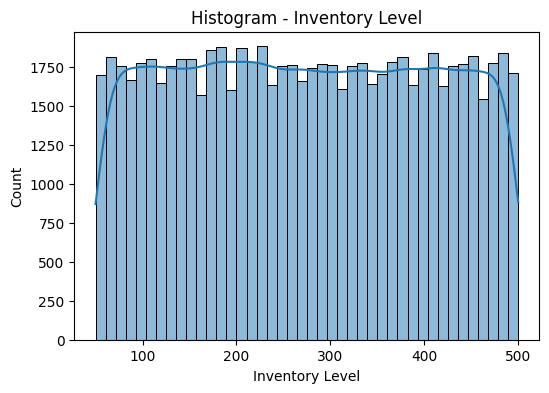

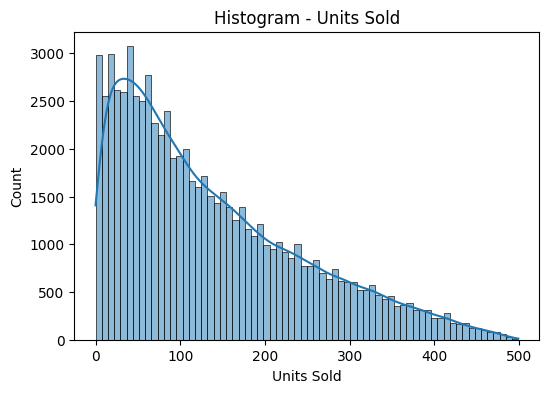

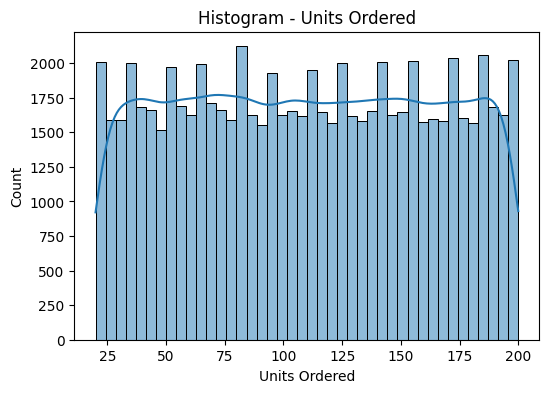

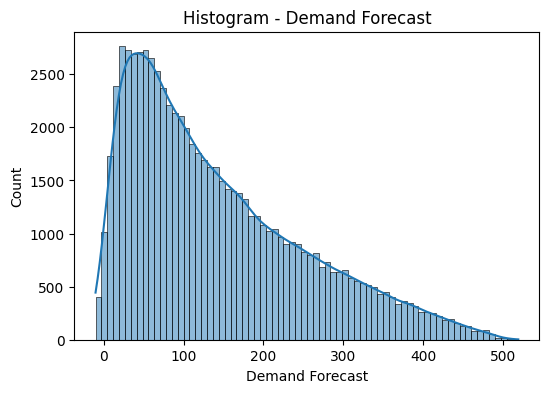

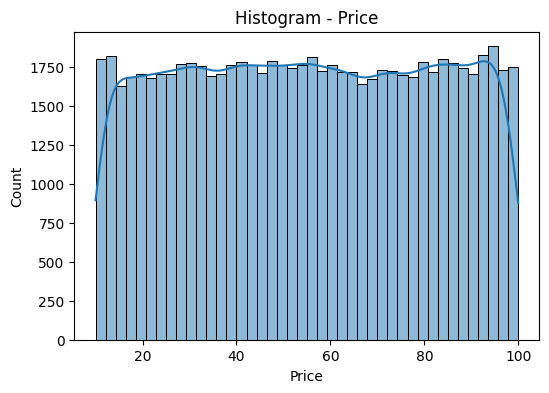

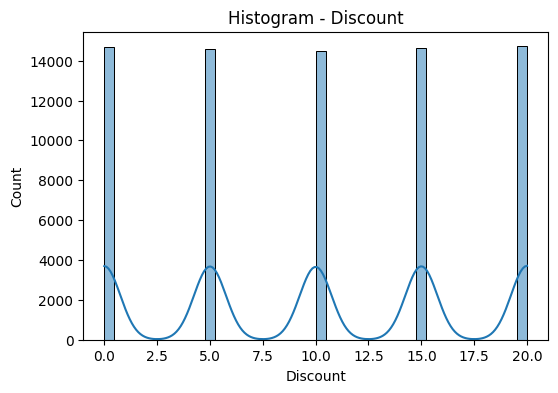

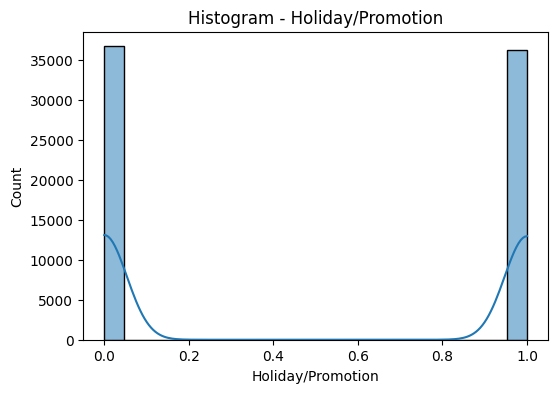

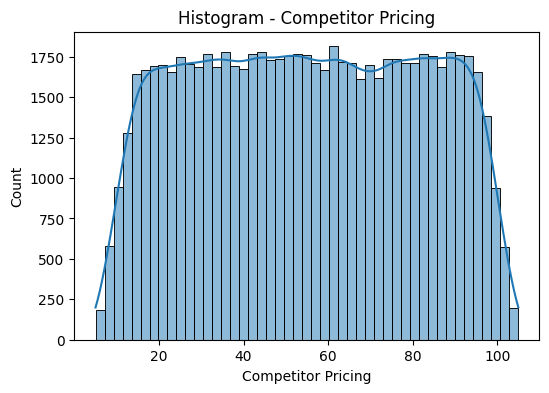

In [15]:
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram - {col}")
    plt.show()


**Boxplot:-** A boxplot (also called a box-and-whisker plot) is a visualization used to understand how your data is spread and to detect outliers quickly.

**BoxPlot For All Numeric Columns:-**

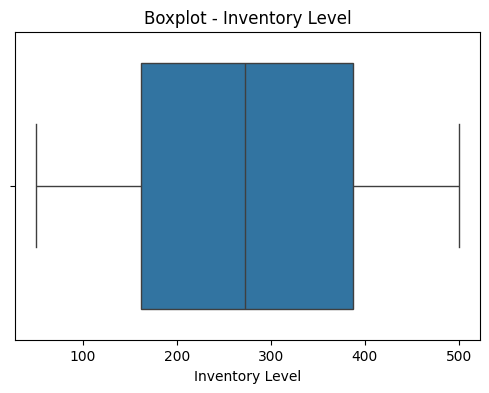

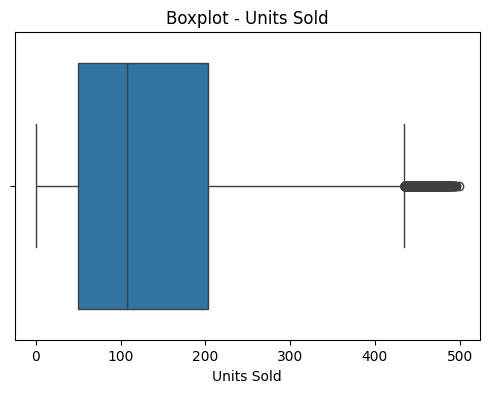

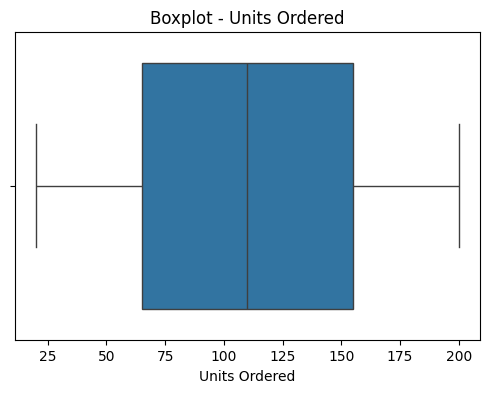

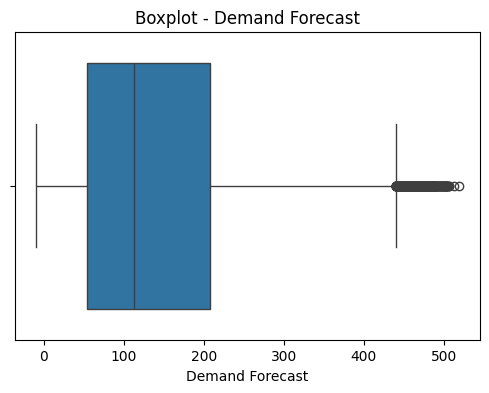

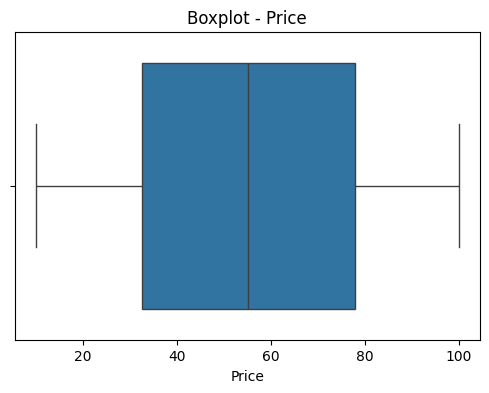

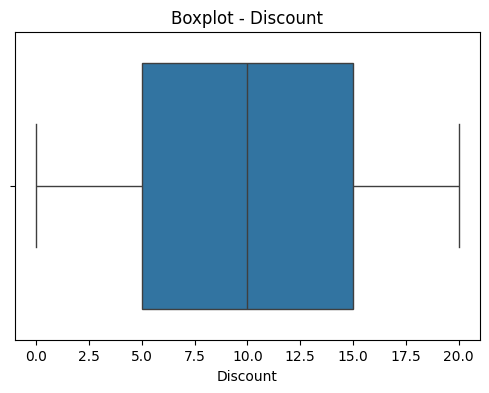

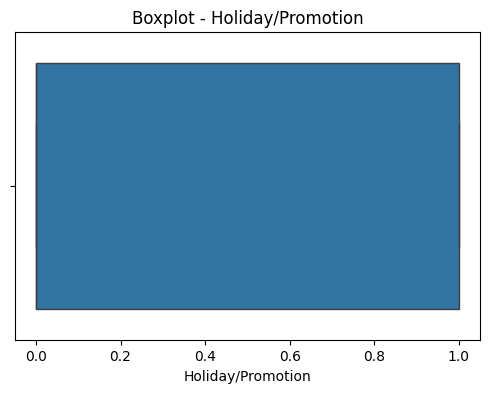

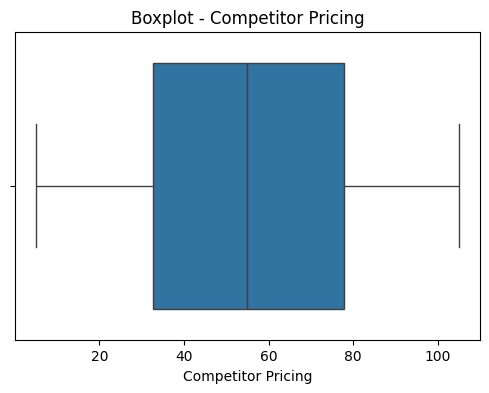

In [16]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()


**Distribution Plot:-**

A distribution plot (often called a distplot, density plot, or KDE plot) shows how your data values are spread across a range.

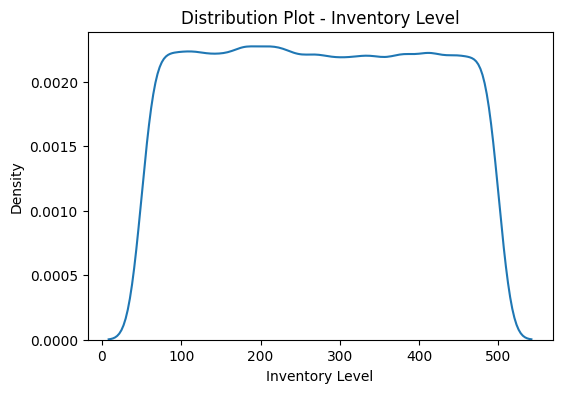

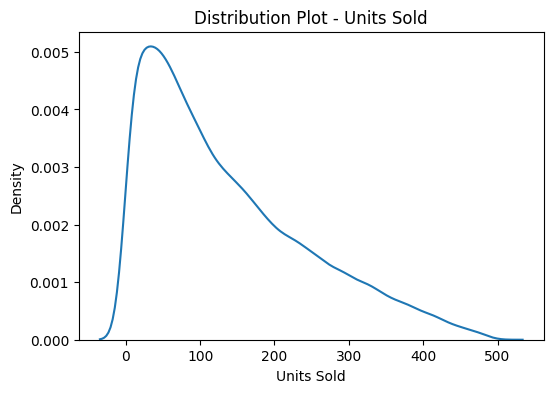

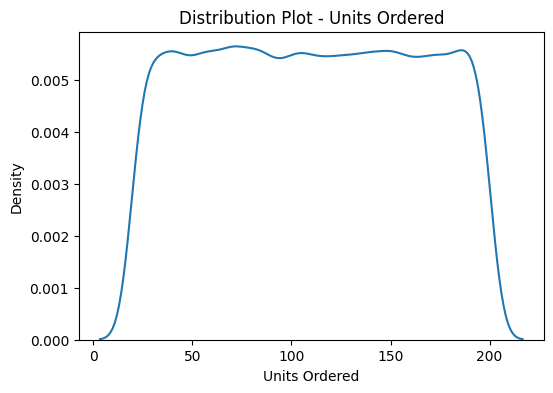

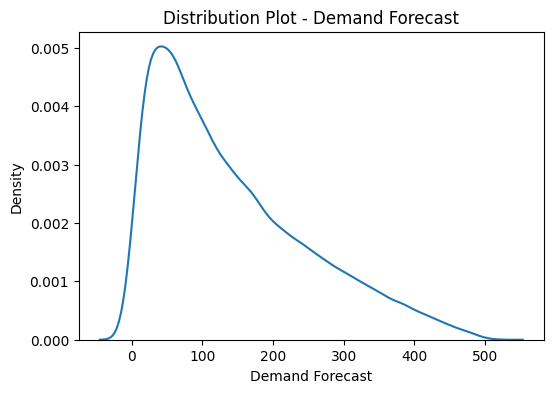

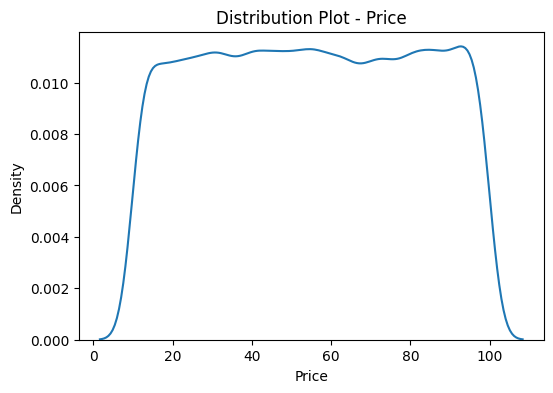

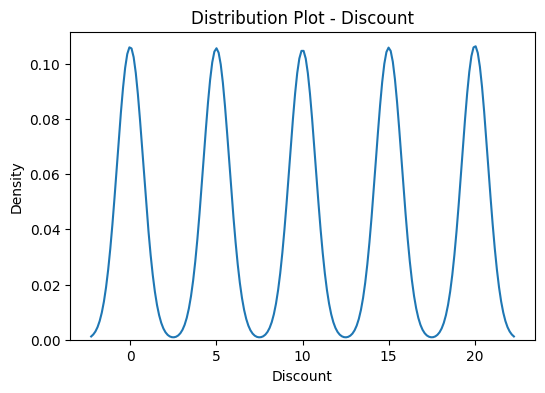

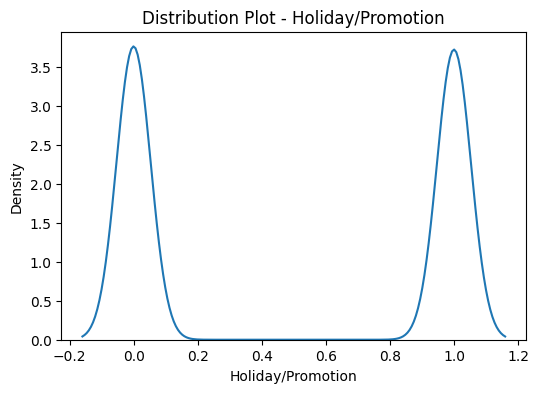

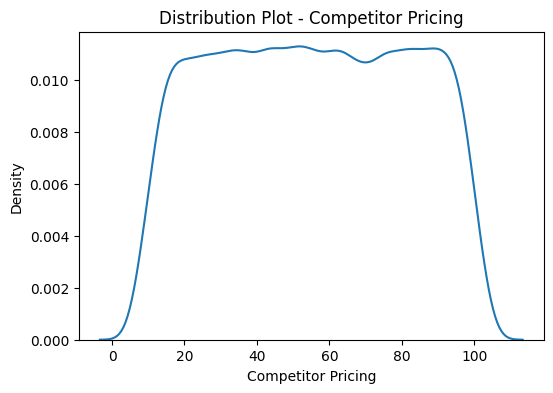

In [17]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[col])
    plt.title(f"Distribution Plot - {col}")
    plt.show()


**CountPlot**

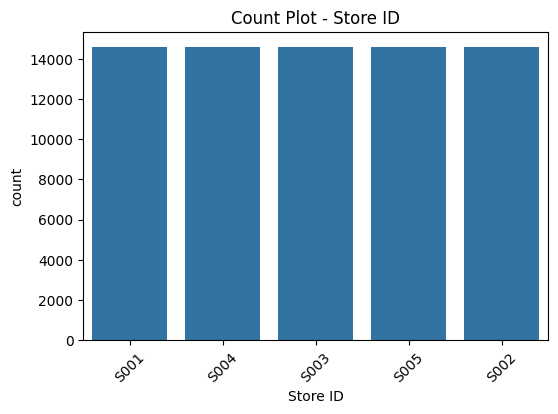

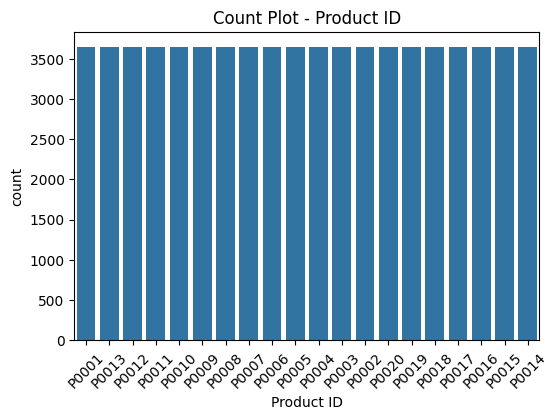

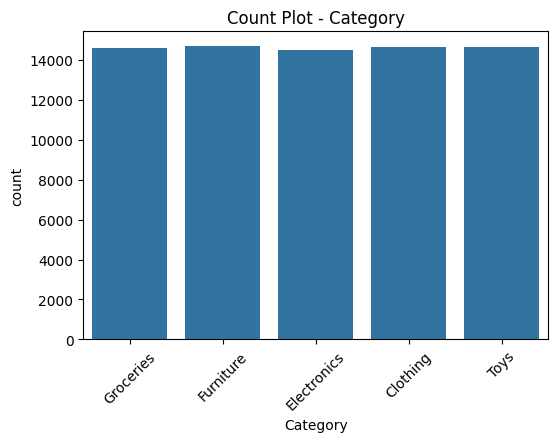

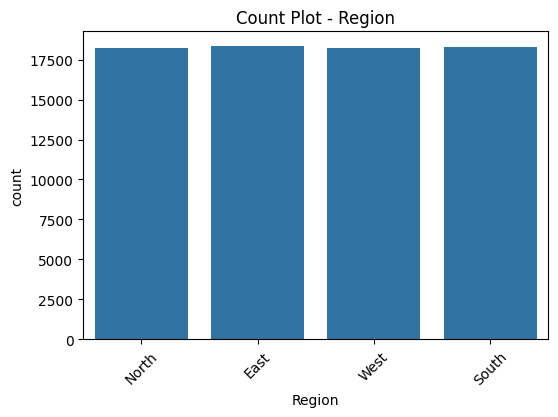

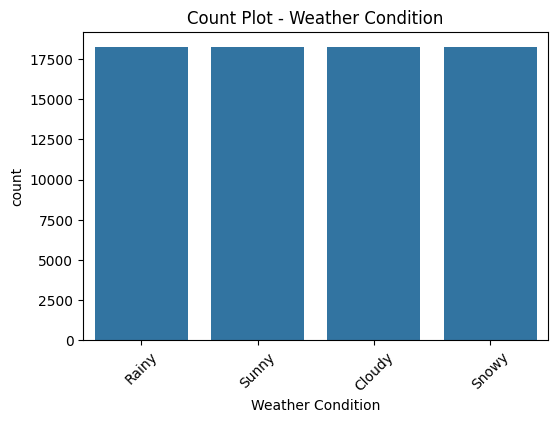

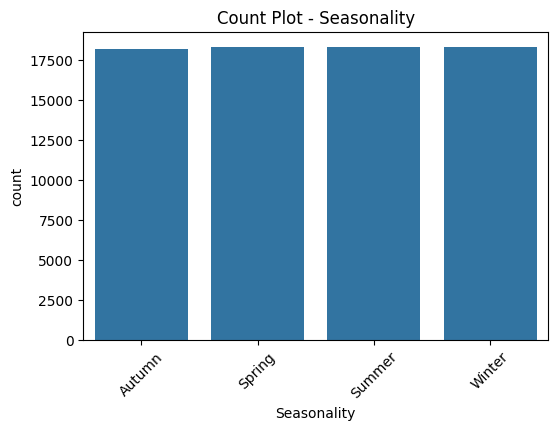

In [18]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot - {col}")
    plt.xticks(rotation=45)
    plt.show()


**Pairplot of All Numeric Columns:-**

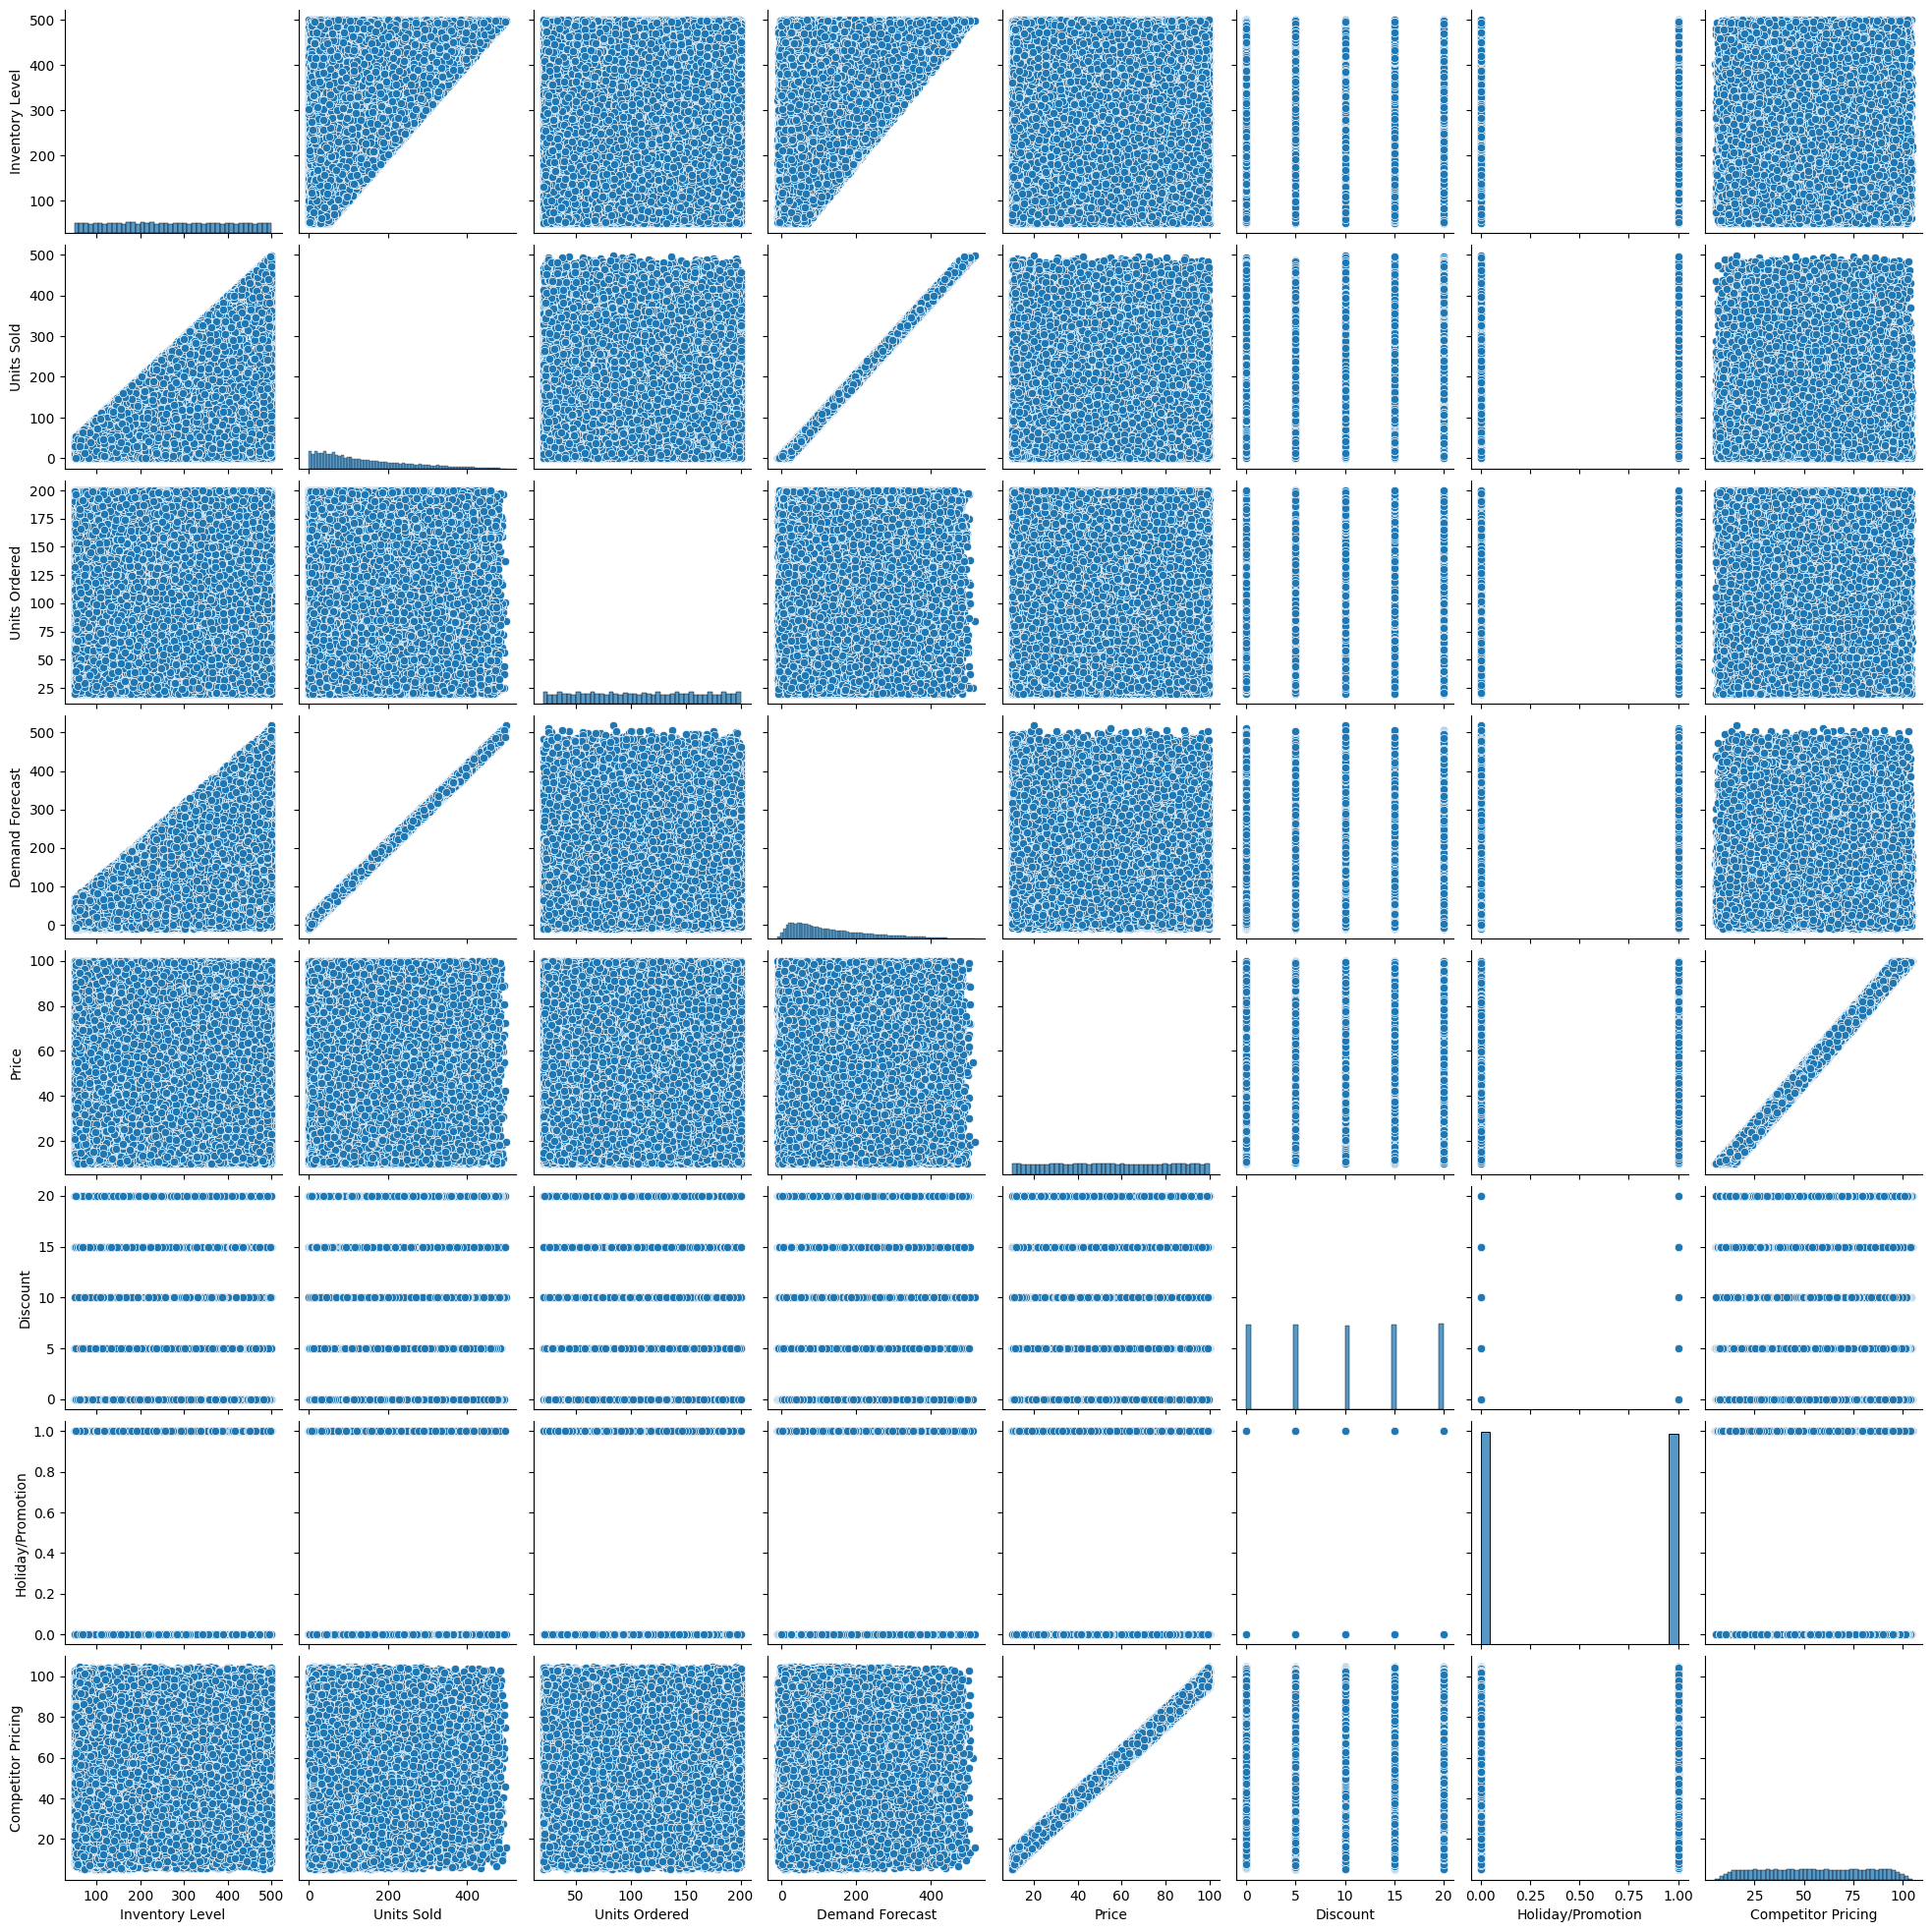

In [19]:
sns.pairplot(df[numeric_cols])
plt.show()


**Choose the target (what to forecast):-**

In [20]:
# Heuristic pick
candidate_names = ['Inventory Level','Inventory','Units Sold','Units','Sales','Quantity','Demand']
target = None
for t in candidate_names:
    if t in df.columns:
        target = t
        break

# fallback: first numeric column if none of the above exists
if target is None:
    nums = df.select_dtypes(include=[np.number]).columns.tolist()
    if not nums:
        raise ValueError("No numeric column found for target.")
    target = nums[0]

print("Target chosen:", target)


Target chosen: Inventory Level


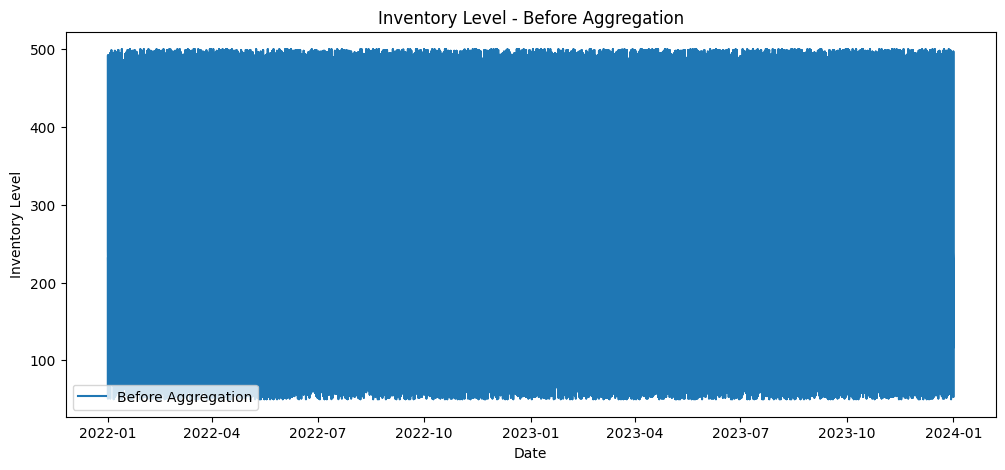

In [21]:
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Inventory Level"], label="Before Aggregation")
plt.title("Inventory Level - Before Aggregation")
plt.xlabel("Date")
plt.ylabel("Inventory Level")
plt.legend()
plt.show()


In [22]:
df["Date"].duplicated().sum()



np.int64(72369)

In [23]:
df[date_col].value_counts().head(10)


Date
2024-01-01    100
2022-01-01    100
2022-01-02    100
2022-01-03    100
2022-01-04    100
2022-01-05    100
2022-01-06    100
2022-01-07    100
2022-01-08    100
2022-01-09    100
Name: count, dtype: int64

**We check Date duplicates using df["Date"].duplicated().sum(). If duplicates exist, it means multiple transactions occurred on the same day, so we need aggregation to convert transactional data into a daily time-series format for forecasting models**

**Your dataset had multiple rows per date (stores, products). Aggregation sums daily totals and simplifies modeling for a single overall forecast. If you want per-product forecasting, skip this and loop by product later.**

**rows collapsed to one per calendar day; missing days are generated and linearly interpolated (good for small gaps).**

In [24]:
# Aggregate numeric columns by date (daily)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
agg_df = df.groupby(date_col)[numeric_cols].sum().reset_index()
agg_df = agg_df.rename(columns={date_col: "Date"}).sort_values("Date").reset_index(drop=True)

# set daily frequency — creates missing days as NaN which we will fill
series = agg_df.set_index("Date").asfreq("D")
series = series.interpolate()   # linear interpolation fills small gaps
print("Aggregated daily shape:", series.shape)
series[[target]].head()


Aggregated daily shape: (731, 8)


Inventory Level
Date                       
2022-01-01            28424
2022-01-02            27250
2022-01-03            27269
2022-01-04            27588
2022-01-05            28680

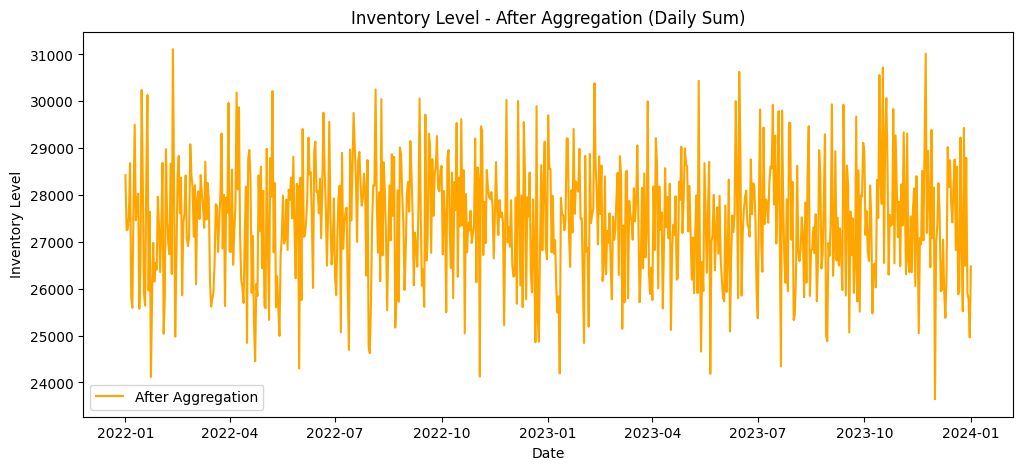

In [25]:
plt.figure(figsize=(12,5))
plt.plot(agg_df["Date"], agg_df["Inventory Level"], label="After Aggregation", color="orange")
plt.title("Inventory Level - After Aggregation (Daily Sum)")
plt.xlabel("Date")
plt.ylabel("Inventory Level")
plt.legend()
plt.show()


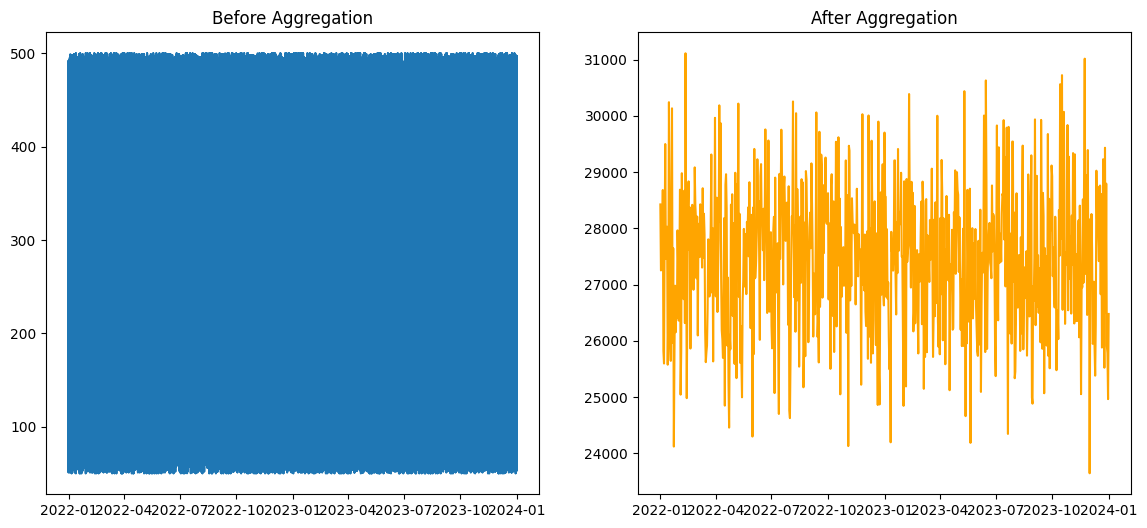

In [26]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(df["Date"], df["Inventory Level"])
plt.title("Before Aggregation")

plt.subplot(1,2,2)
plt.plot(agg_df["Date"], agg_df["Inventory Level"], color ="orange")
plt.title("After Aggregation")

plt.show()


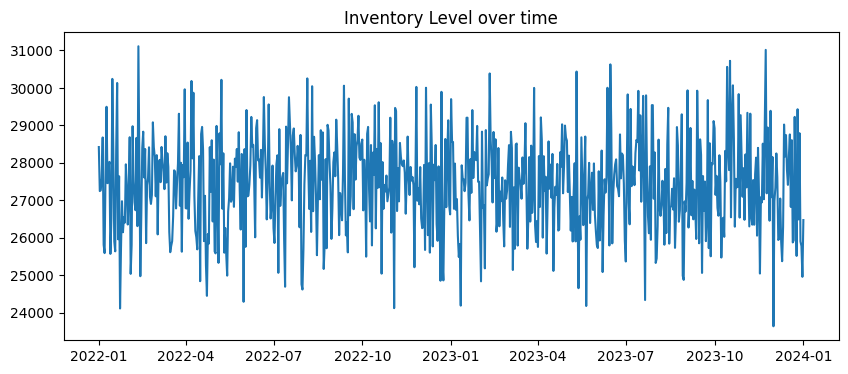

In [27]:
plt.figure(); plt.plot(series.index, series[target]); plt.title(f"{target} over time"); plt.show()


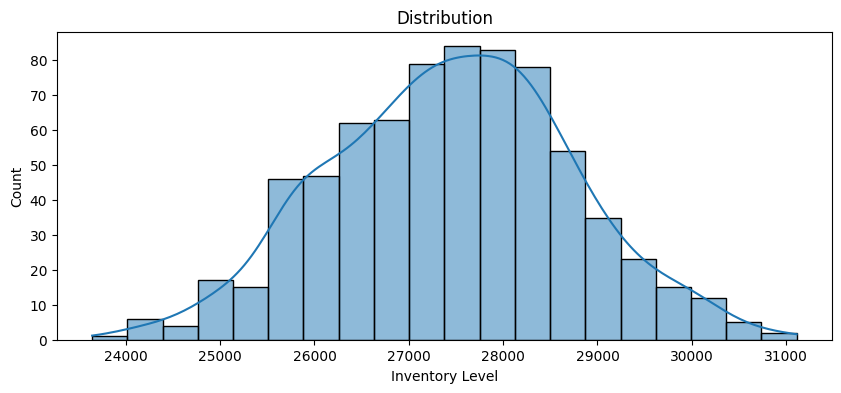

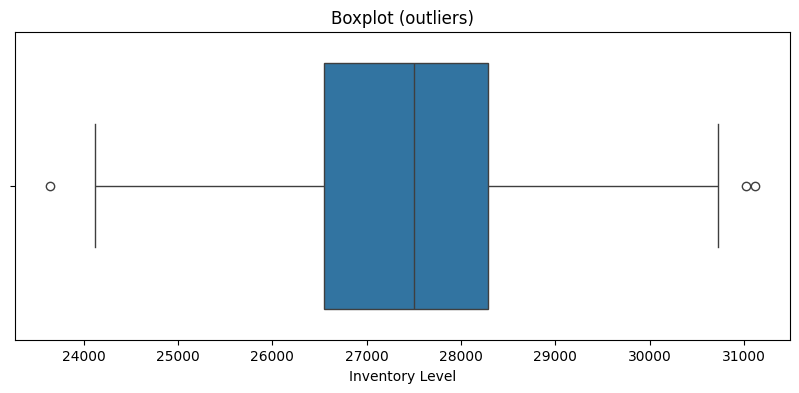

In [28]:
plt.figure(); sns.histplot(series[target].dropna(), kde=True); plt.title("Distribution"); plt.show()
plt.figure(); sns.boxplot(x=series[target].dropna()); plt.title("Boxplot (outliers)"); plt.show()

**Stationarity**

**Stationarity ensures that time-series models learn stable patterns. Most forecasting algorithms need stationary data because changing statistical properties make it impossible to predict the future reliably. We make data stationary by differencing, detrending, and removing seasonality

In [29]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(series[target].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -26.658563543875424
p-value: 0.0


**Decomposition**
Detecting trend direction

Understanding if seasonality exists

Selecting correct forecasting model

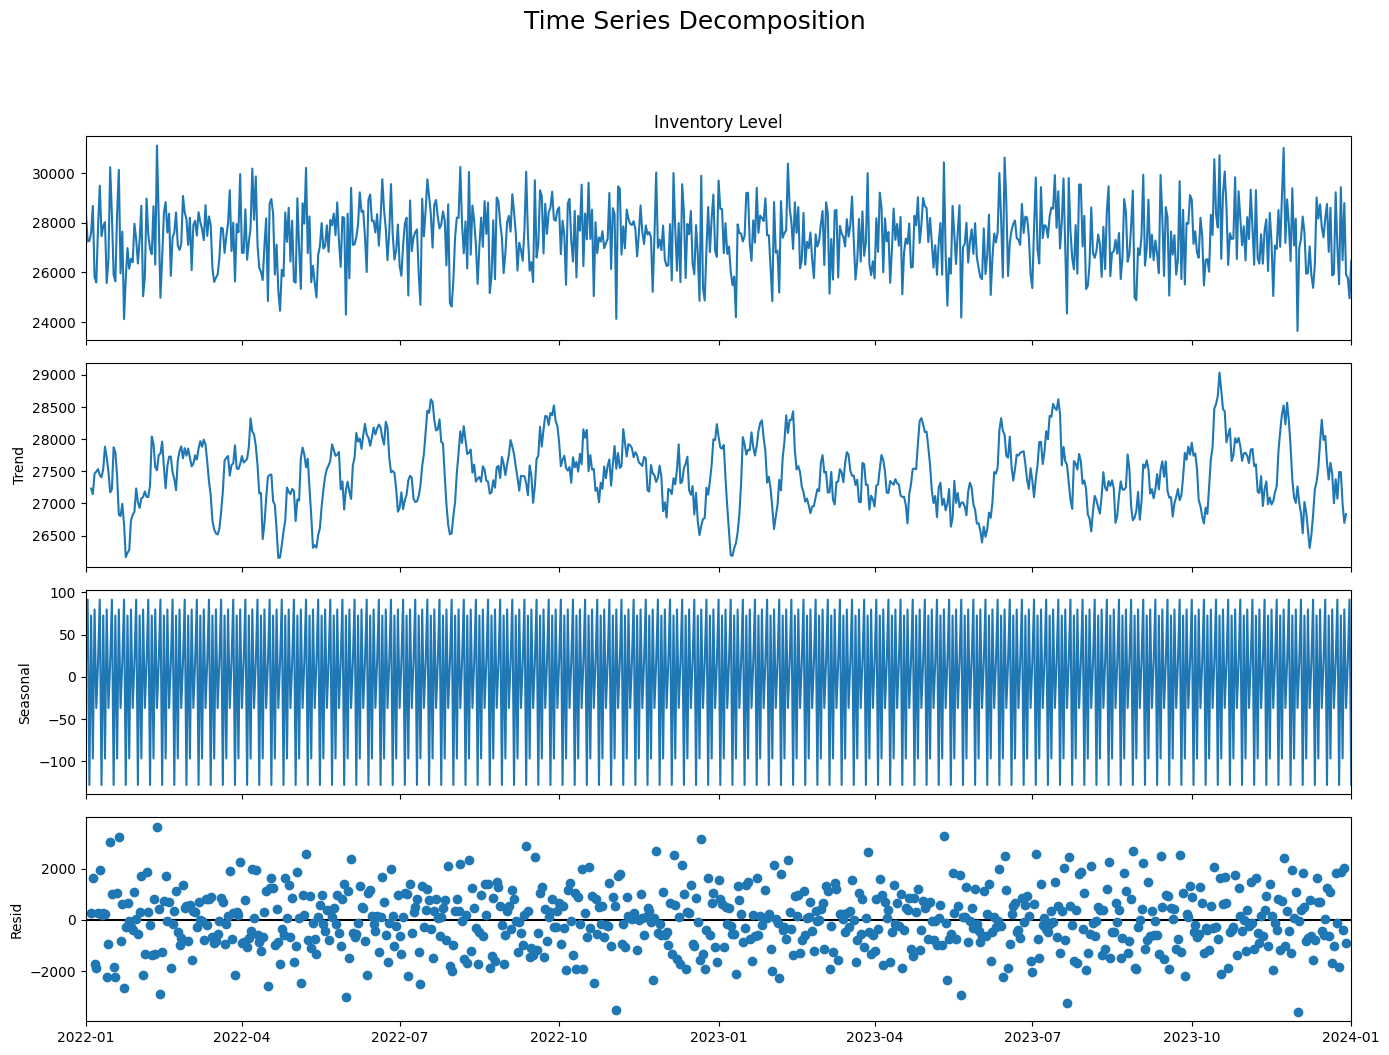

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

ts = series[target].dropna()

result = seasonal_decompose(ts, model='additive', period=7)

# Plot with proper spacing
plt.rcParams["figure.figsize"] = (14,10)
fig = result.plot()
fig.suptitle("Time Series Decomposition", fontsize=18, y=1.05)  # push title upward
plt.tight_layout()  # fix overlapping layout
plt.show()


**1.Observed:-** The original actual values
**2. Trend**
Shows whether inventory demand is increasing or decreasing.

**3.Seasonal:-** Repeating patterns.
Example:

Weekend high sales → weekly seasonality (Lag 7)
Festival peaks → strong seasonal component

**4. Residual**

Unpredictable noise.
Used for anomaly detection

**ACF**

Compares the series with its previous days (lags)

Shows repeating patterns and seasonality

<Figure size 1200x400 with 0 Axes>

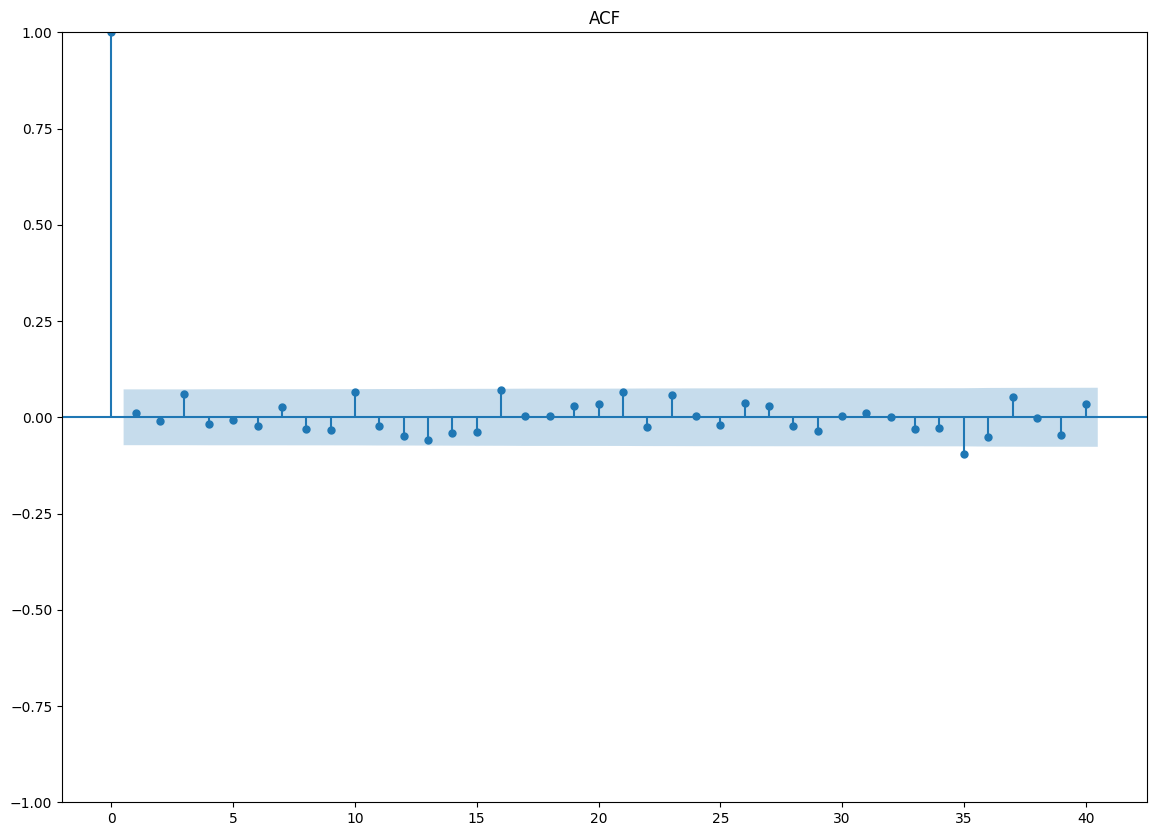

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,4)); plot_acf(ts, lags=40); plt.title("ACF"); plt.show()


**PACF**

Shows pure correlation at each lag after removing effects from intermediate lags

Helps choose AR (Auto-Regressive) order = p

<Figure size 1200x400 with 0 Axes>

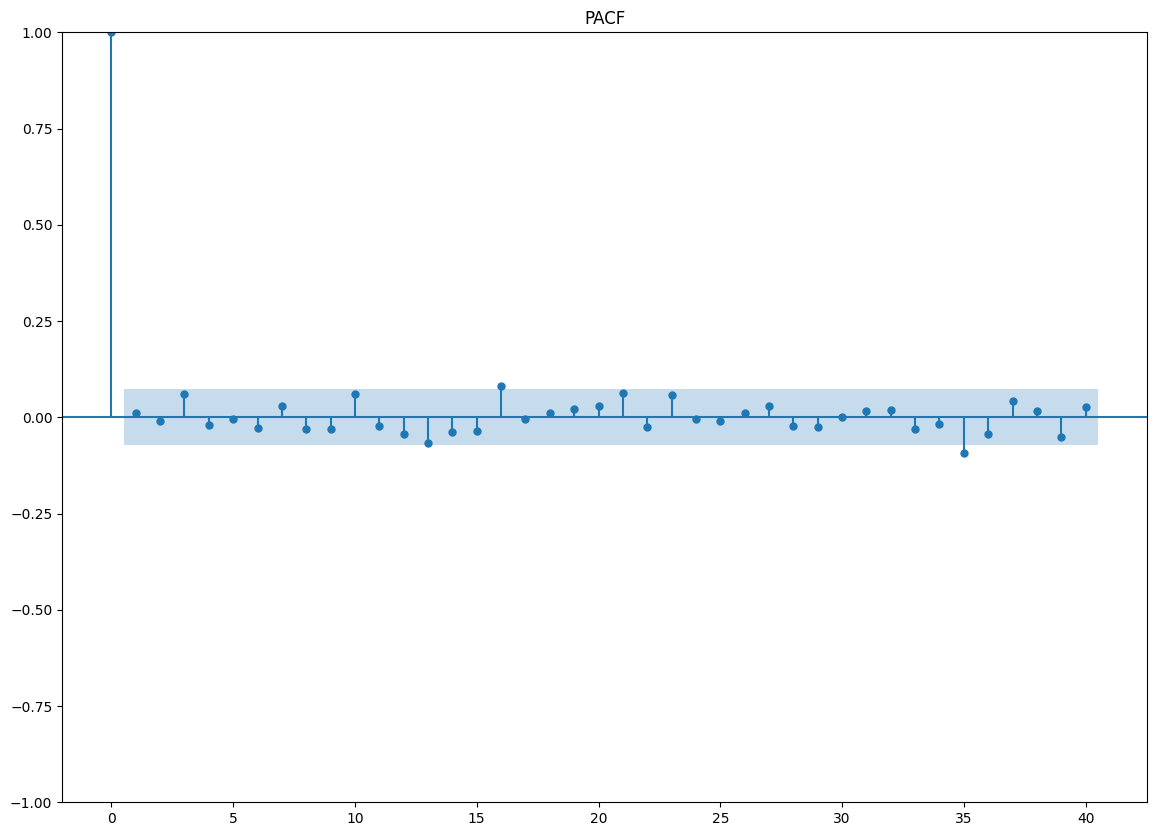

In [33]:
plt.figure(figsize=(12,4)); plot_pacf(ts, lags=40, method="ywm"); plt.title("PACF"); plt.show()

**Feature Engineering**
Time features (month/day/week) and lag/rolling features give ML models temporal signals. LSTM uses raw sequences, but ML models need these explicit features.

In [36]:
import numpy as np

sdf = series.reset_index().copy()   # working DF with Date + numeric columns
sdf['year'] = sdf['Date'].dt.year
sdf['month'] = sdf['Date'].dt.month
sdf['day'] = sdf['Date'].dt.day
sdf['dayofweek'] = sdf['Date'].dt.dayofweek
sdf['is_weekend'] = (sdf['dayofweek'] >= 5).astype(int)




In [38]:
lag_list = [1,2,3,7]   # conservative, explainable
for l in lag_list:
    sdf[f'lag_{l}'] = sdf[target].shift(l)

In [39]:
rolling_windows = [3,7,14]
for w in rolling_windows:
    sdf[f'roll_mean_{w}'] = sdf[target].shift(1).rolling(window=w).mean()
    sdf[f'roll_std_{w}']  = sdf[target].shift(1).rolling(window=w).std()

# drop rows with NaNs created by lagging/rolling
print("Shape before dropna:", sdf.shape)
sdf = sdf.dropna().reset_index(drop=True)
print("Shape after dropna:", sdf.shape)

# final feature list
feature_cols = [c for c in sdf.columns if c not in ['Date', target]]
print("Feature columns:", feature_cols)


Shape before dropna: (731, 24)
Shape after dropna: (717, 24)
Feature columns: ['Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Holiday/Promotion', 'Competitor Pricing', 'year', 'month', 'day', 'dayofweek', 'is_weekend', 'lag_1', 'lag_2', 'lag_3', 'lag_7', 'roll_mean_3', 'roll_std_3', 'roll_mean_7', 'roll_std_7', 'roll_mean_14', 'roll_std_14']


what happens:- new columns like lag_1, roll_mean_7. These provide historical context for ML models. Rows at start without prior history are removed.
**lag:-** You take past values of the target column and use them as features

**Train/test split (time-aware)**
For time series, split by time (not random). Train on past, test on future — this avoids leakage.

In [41]:
# Define test ratio
test_ratio = 0.2   # keep 20% for testing

dates = sdf['Date'].values
n = len(sdf)

# Split index
split_idx = int((1 - test_ratio) * n)

# Train-test split
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print("Train size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)


Train size: (573, 22) (573,)
Test size: (144, 22) (144,)


**What happens: creates X_train, X_test, etc. Models will be trained on X_train and evaluated on X_test.**



**Scaling**:-
Neural nets (LSTM/autoencoders) need scaled inputs. Tree models (RandomForest, XGBoost) don’t require scaling but using scaled input is fine.



In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_s = scaler_X.fit_transform(X_train)
X_test_s  = scaler_X.transform(X_test)
y_train_s = scaler_y.fit_transform(y_train.reshape(-1,1)).ravel()
y_test_s  = scaler_y.transform(y_test.reshape(-1,1)).ravel()


Scaling makes all features equal so the model learns fairly and smoothly.
 Without scaling, deep learning will fail and ML models will be biased.

**Train classical ML models (LR, RF, XGBoost)**

Create baselines and strong tabular model (XGBoost). We compare them to LSTM later.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import time

# Linear Regression (baseline)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [44]:
# Random Forest
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)

In [45]:
# XGBoost
import xgboost as xgb
from xgboost import XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=-1, num_parallel_tree=None, ...)

What happens: models learn mapping from engineered features to target. RF/XGB often capture non-linear patterns well.

 **Evaluate ML models**

Compare RMSE/MAE/R² so you know which model is best on test set.

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate(name, model, X_t, y_t):
    preds = model.predict(X_t)
    mse = mean_squared_error(y_t, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_t, preds)
    r2 = r2_score(y_t, preds)
    print(f"{name}: RMSE={rmse:.4f}, MAE={mae:.4f}, R2={r2:.4f}")
    return preds, rmse, mae, r2

lr_preds, lr_rmse, lr_mae, lr_r2 = evaluate("LinearRegression", lr, X_test, y_test)
rf_preds, rf_rmse, rf_mae, rf_r2 = evaluate("RandomForest", rf, X_test, y_test)
xgb_preds, xgb_rmse, xgb_mae, xgb_r2 = evaluate("XGBoost", xgb, X_test, y_test)


LinearRegression: RMSE=1034.2184, MAE=788.0554, R2=0.4083
RandomForest: RMSE=1062.3517, MAE=824.2164, R2=0.3757
XGBoost: RMSE=1141.1130, MAE=889.3927, R2=0.2797


What happens: prints model performance. Lower RMSE/MAE and higher R² are better.

**SHAP Explainability for XGBoost**

SHAP tells you which features influenced predictions (global & local). Very valuable for business insights.

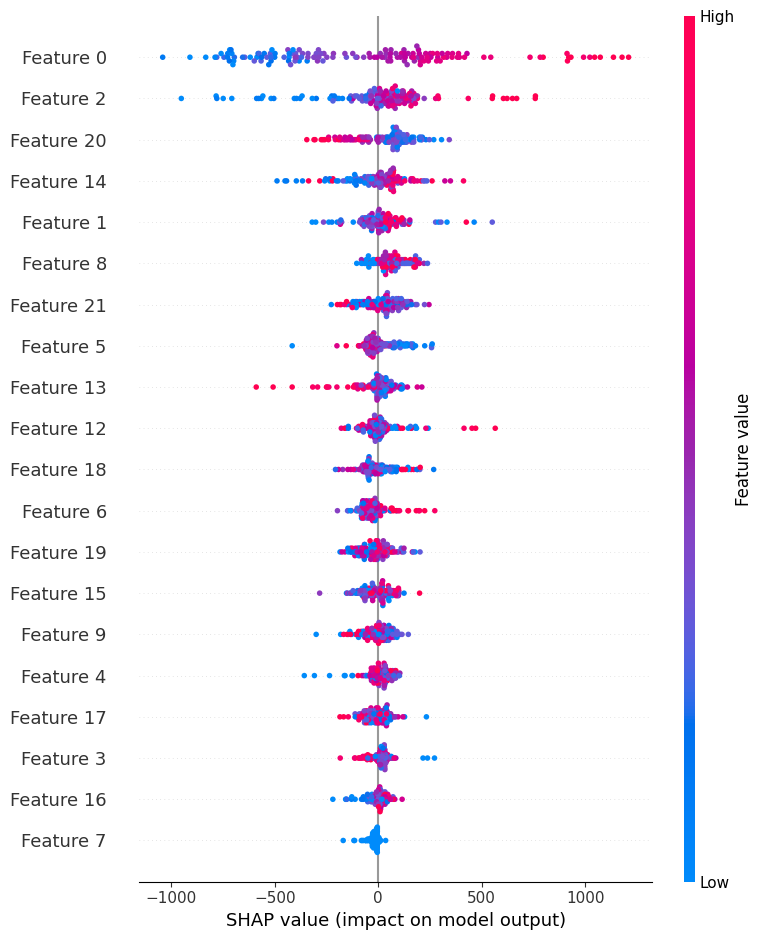

In [47]:
# XGBoost model (your earlier code)
import xgboost as xgb
from xgboost import XGBRegressor

xgb = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

# SHAP Explanation Code (corrected)
try:
    import shap

    # Create SHAP explainer for XGBoost
    explainer = shap.Explainer(xgb)

    # Take max 200 samples for faster computation
    X_sample = X_test[:min(200, X_test.shape[0])]

    # Calculate SHAP values
    shap_values = explainer(X_sample)

    # Summary plot
    shap.summary_plot(shap_values, X_sample)

except Exception as e:
    print("SHAP not available or failed:", e)


What happens: produces a SHAP summary plot showing most important lags/rolling features and their impact direction (positive/negative).

**IsolationForest for anomaly detection**

This means we look for days where the inventory values are too low or too high compared to normal days.

In [49]:
from sklearn.ensemble import IsolationForest
import numpy as np

# -------------------------
# 1. Create date splits
# -------------------------
dates = sdf['Date']

dates_train = dates[:split_idx]
dates_test  = dates[split_idx:]

# -------------------------
# 2. Fit Isolation Forest
# -------------------------

iso = IsolationForest(contamination=0.01, random_state=42)
iso.fit(X_train)

iso_labels_train = iso.predict(X_train)
iso_labels_test  = iso.predict(X_test)

# -------------------------
# 3. Find anomaly dates in test
# -------------------------
anomalies_idx = np.where(iso_labels_test == -1)[0]

anomaly_dates = [dates_test.iloc[i] for i in anomalies_idx]

print("Anomalous test dates:", anomaly_dates)


Anomalous test dates: [Timestamp('2023-10-20 00:00:00'), Timestamp('2023-10-29 00:00:00'), Timestamp('2023-12-04 00:00:00'), Timestamp('2023-12-31 00:00:00')]


These rows have very different values compared to the regular pattern.

The model does not understand them well because they are unusual or rare.

**Prepare sequences & train an LSTM**

LSTM reads windows of past days and can learn temporal patterns (trends, seasonality) without explicit lag features (but we will use lag features too for richer inputs). LSTM often outperforms classical ML for strong temporal dependencies.

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1036 - val_loss: 0.0478
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0339 - val_loss: 0.0427
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0329 - val_loss: 0.0404
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0324 - val_loss: 0.0394
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0322 - val_loss: 0.0389
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0320 - val_loss: 0.0386
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0318 - val_loss: 0.0384
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0317 - val_loss: 0.0383
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0316 - val_loss: 0.0382
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0315 - val_loss: 0.0382
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
LSTM -> RMSE: 1366.4843135562026 MAE: 1108.7871370789007 R2: -0.023165460779426716


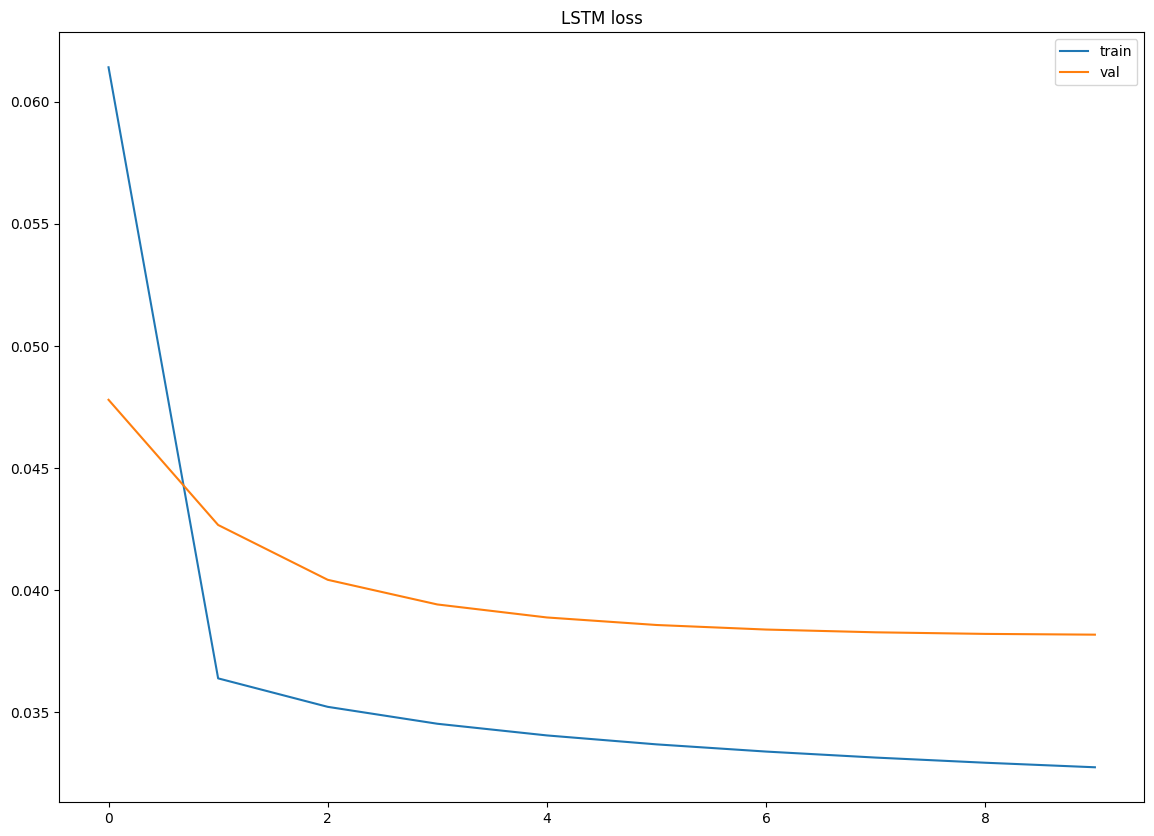

In [50]:
# Create sliding windows from scaled features
def create_sequences(Xs, ys, window):
    X_seq, y_seq = [], []
    for i in range(len(Xs) - window):
        X_seq.append(Xs[i:i+window])
        y_seq.append(ys[i+window])
    return np.array(X_seq), np.array(y_seq)

# For LSTM we use scaled features
X_s_all = scaler_X.transform(X)      # entire feature matrix scaled
y_s_all = scaler_y.transform(y.reshape(-1,1)).ravel()

seq_len = 14
X_seq, y_seq = create_sequences(X_s_all, y_s_all, seq_len)
split_seq = int((1-test_ratio) * len(X_seq))
X_seq_train, X_seq_test = X_seq[:split_seq], X_seq[split_seq:]
y_seq_train, y_seq_test = y_seq[:split_seq], y_seq[split_seq:]

# Build a simple LSTM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
tf.random.set_seed(42)

model_lstm = Sequential([
    LSTM(32, input_shape=(X_seq_train.shape[1], X_seq_train.shape[2])),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')

# Train
history = model_lstm.fit(X_seq_train, y_seq_train, epochs=10, batch_size=8,
                         validation_data=(X_seq_test, y_seq_test), verbose=1)

# Predict and inverse transform to original scale
y_seq_pred_s = model_lstm.predict(X_seq_test).ravel()
y_seq_pred = scaler_y.inverse_transform(y_seq_pred_s.reshape(-1,1)).ravel()
y_seq_test_orig = scaler_y.inverse_transform(y_seq_test.reshape(-1,1)).ravel()

# Metrics for LSTM
lstm_rmse = np.sqrt(mean_squared_error(y_seq_test_orig, y_seq_pred))
lstm_mae = mean_absolute_error(y_seq_test_orig, y_seq_pred)
lstm_r2 = r2_score(y_seq_test_orig, y_seq_pred)
print("LSTM -> RMSE:", lstm_rmse, "MAE:", lstm_mae, "R2:", lstm_r2)


# Plot training loss
plt.figure(); plt.plot(history.history['loss'], label='train'); plt.plot(history.history['val_loss'], label='val')
plt.title("LSTM loss"); plt.legend(); plt.show()


**Autoencoder**

Autoencoders can be used to detect anomalies (train to reconstruct normal patterns; large reconstruction error => anomaly). This is an alternative to IsolationForest.

In [51]:
# Build a simple dense autoencoder on scaled features
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_dim = X_train_s.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder on training set
autoencoder.fit(X_train_s, X_train_s, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Compute reconstruction error on test set
recon_test = autoencoder.predict(X_test_s)
mse_recon = np.mean(np.square(X_test_s - recon_test), axis=1)
# Flag anomalies where reconstruction MSE > threshold (e.g., mean + 3*std)
th = mse_recon.mean() + 3*mse_recon.std()
anomaly_idx = np.where(mse_recon > th)[0]
print("Autoencoder anomalies in test set:", anomaly_idx)


Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2844 - val_loss: 0.2711
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1849 - val_loss: 0.1486
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0998 - val_loss: 0.0924
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0673 - val_loss: 0.0725
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0549 - val_loss: 0.0662
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0507 - val_loss: 0.0630
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0472 - val_loss: 0.0583
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0435 - val_loss: 0.0540
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0403 - val_loss: 0.0499
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0375 - val_loss: 0.0464
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0347 - val_loss: 0.0435
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321 - val_l